## Задача
Сеть фитнесс-центров "Культурист-датасаентист" разрабатывает стратегия взаимодестввия с пользователями на основе аналитических данных. Распространённая проьоема фитнес-клубов и других сервисов - отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тез, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо. Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине - не похоже, что он "отвалился". А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плози: подписчик заскучал и, кажется, оставил вас. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал - скорее всего, он не вернется. Чтобы бороться с оттоком, отдел по работе с клинтами "Культуриста-датасаентиста" перевёл в электронный вид множество анкет пользователей. 

**Задача - провести анализ и подготовить план действий по удержанию клиентов. А именно:**
- Научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать из основные свойства
- Проанализировать основные признаки, наиболее сильно влияющие на отток
- Cформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    - Выделить целевые группы клиентов
    - Предложить меры по снижению оттока
    - Определить другие особенности заимодейстия с клиентами.

## Спецификация

- 'churn' - факт оттока в текущем месяце (целевая переменная)
- 'gender' - пол
- 'near_location' - проживание или работа в районе, где находится фитнес-центр
- 'partner' - сотрудник компании-партёра клуба
- 'promo_friends' - факт первоначальной записи в рамках акции "приведи друга"
- 'phone' - наличие контактного телефона
- 'age' - возраст
- 'lifetime' - время с первого обращения в фитнесс-центр
- 'contract_period' - длительность текущего действующего аобнемента (месяц, 3 месяца, 6 месяцев, 1 год)
- 'month_to_end_contract' - срок до окончания текущего действующего абонемента (в месяцах)
- 'group_visits' - факт посещения групповых занятий
- 'avg_class_frequency_total' - средняя частота посещений в неделю за все время с начала действия абонемента
- 'avg_class_frequency_current_month' - средняя частота посещений в неделю за предыдущий месяц
- 'avg_additional_charges_total' - суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

# Lab1


## Выгрузка датасета и получение первичной инофрмации

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
import plotly.express as px



In [2]:
df = pd.read_csv('gym.csv')

In [3]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'gender', 'near_location', 'partner', 'promo_friends',
       'phone', 'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   unnamed: 0                         4000 non-null   int64  
 1   gender                             4000 non-null   int64  
 2   near_location                      4000 non-null   int64  
 3   partner                            4000 non-null   int64  
 4   promo_friends                      4000 non-null   int64  
 5   phone                              4000 non-null   int64  
 6   contract_period                    4000 non-null   int64  
 7   group_visits                       4000 non-null   int64  
 8   age                                4000 non-null   int64  
 9   avg_additional_charges_total       4000 non-null   float64
 10  month_to_end_contract              4000 non-null   float64
 11  lifetime                           4000 non-null   int64

In [5]:
df.isna().sum()

unnamed: 0                           0
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

count         mean          std  \
unnamed: 0                         4000.0  1999.500000  1154.844867   
gender                             4000.0     0.510250     0.499957   
near_location                      4000.0     0.845250     0.361711   
partner                            4000.0     0.486750     0.499887   
promo_friends                      4000.0     0.308500     0.461932   
phone                              4000.0     0.903500     0.295313   
contract_period                    4000.0     4.681250     4.549706   
group_visits                       4000.0     0.412250     0.492301   
age                                4000.0    29.184250     3.258367   
avg_additional_charges_total       4000.0   146.943728    96.355602   
month_to_end_contract              4000.0     4.322750     4.191297   
lifetime                           4000.0     3.724750     3.749267   
avg_class_frequency_total          4000.0     1.879020     0.972245   
avg_class_frequency_current_month  4000.0     1.767052     1.052906   
churn                              4000.0     0.265250     0.441521   

                                         min         25%          50%  \
unnamed: 0                          0.000000  999.750000  1999.500000   
gender                              0.000000    0.000000     1.000000   
near_location                       0.000000    1.000000     1.000000   
partner                             0.000000    0.000000     0.000000   
promo_friends                       0.000000    0.000000     0.000000   
phone                               0.000000    1.000000     1.000000   
contract_period                     1.000000    1.000000     1.000000   
group_visits                        0.000000    0.000000     0.000000   
age                                18.000000   27.000000    29.000000   
avg_additional_charges_total        0.148205   68.868830   136.220159   
month_to_end_contract               1.000000    1.000000     1.000000   
lifetime                            0.000000    1.000000     3.000000   
avg_class_frequency_total           0.000000    1.180875     1.832768   
avg_class_frequency_current_month   0.000000    0.963003     1.719574   
churn                               0.000000    0.000000     0.000000   

                                           75%          max  
unnamed: 0                         2999.250000  3999.000000  
gender                                1.000000     1.000000  
near_location                         1.000000     1.000000  
partner                               1.000000     1.000000  
promo_friends                         1.000000     1.000000  
phone                                 1.000000     1.000000  
contract_period                       6.000000    12.000000  
group_visits                          1.000000     1.000000  
age                                  31.000000    41.000000  
avg_additional_charges_total        210.949625   552.590740  
month_to_end_contract                 6.000000    12.000000  
lifetime                              5.000000    31.000000  
avg_class_frequency_total             2.536078     6.023668  
avg_class_frequency_current_month     2.510336     6.146783  
churn                                 1.000000     1.000000

Данные равномерные, стандартные отклонения не очень далеко от средних, а также не похоже, что есть выбросы

In [8]:
df.groupby('churn').mean()

unnamed: 0    gender  near_location   partner  promo_friends  \
churn                                                                  
0      1992.500851  0.510037       0.873086  0.534195       0.353522   
1      2018.887842  0.510839       0.768143  0.355325       0.183789   

          phone  contract_period  group_visits        age  \
churn                                                       
0      0.903709         5.747193      0.464103  29.976523   
1      0.902922         1.728558      0.268615  26.989632   

       avg_additional_charges_total  month_to_end_contract  lifetime  \
churn                                                                  
0                        158.445715               5.283089  4.711807   
1                        115.082899               1.662582  0.990575   

       avg_class_frequency_total  avg_class_frequency_current_month  
churn                                                                
0                       2.024876                           2.027882  
1                       1.474995                           1.044546

В бинарных полях ("gender", "near_location" и др) - чем ближе среднее значение к единице, тем больше клиентов с этим признаком (то есть он равен 1).

- (-) "gender" (пол) - среднее одинаково, это говорит о том, что этот признак не влияет на отток/приток.(-)
- (+-) "near_location" (проживание или работа рядом) - надо отметить высокий показатель и там и там - это значит большая часть клиентов, это те кто проживает и работает рядом. И отток клиентов идет бОльший среди тех кто НЕближе. Можно сказать, что этот признак слабо влияет на отток (положительно на клиентов).(+)
- (+) "partner" - Также это поле оказавет положительное влияние на клиентов, - среди партнеров оттток меньше.(+)
- (+) "promo_friends" - И это поле оказывает положительное влияние на клиентов, - отток среди "Промщиков" меньше.(+)
- (-) "phone" - много тех кто оставил свои телефоны в анкете, но толку от этого мало :) - никакого влияния.(-)
- (+) "contract_period" - довольно приличное положительное влияние на клиентов - это вполне логично, если у тебя уже куплен абонемент на год, за это заплачены деньги, есть стимул ходить, что бы деньги не пропали даром (нежели чем если ты купил на месяц,- здесь и бросить можно походив пару недель - и не жалко будет). Влияние признака на клиентов высокое.(+)
- (+) "group_visits" - тоже оказывает сильное положительное влияние,- групповая терапия это хорошо:), если человек ходит в группы, он социализируется, появляются новые друзья связи и т.д., которые будут притягивать его в фитнес-центр.(+)
- (+-) "age" - оказывает слабое положительное влияние на клиентов, - "спорту все возрасты покорны".(+-)
- (+-) "avg_additional_charges_total" - выручка от других услуг - оказывает слабое положительное влияние, похоже люди неохотно тратят деньги на побочные услуги - их больше интересует то, что входит в абонемент.(+-)
- (+) "month_to_end_contract" - сильное положительное влияние на клиентов. Еще много осталось отходить, обидно будет если столько добра пропадет даром.(+)
- (+) "lifetime" - очень сильное положительное влияние на клиентов, - логично: чем дольше человек ходит, тем это сильнее закрепляется у него как привычка.(+)
- (+-) "avg_class_frequency_total" - признак оказывает слабое положительное влияние. Все клиенты разные, все живут в разном темпе со своими делами и заботами, поэтому кто-то ходит каждый день, а кто-то раз в неделю, но все-таки чем чаще клиент ходит тем вероятность продолжать ходить больше - привычка.(+-)
- (+) "avg_class_frequency_current_month" - все логично, чем чаще за неделю клиент ходил в фитнес в ближайщий период, тем привычка сильнее, - хорошее положительное влияние на клиентов.(+)

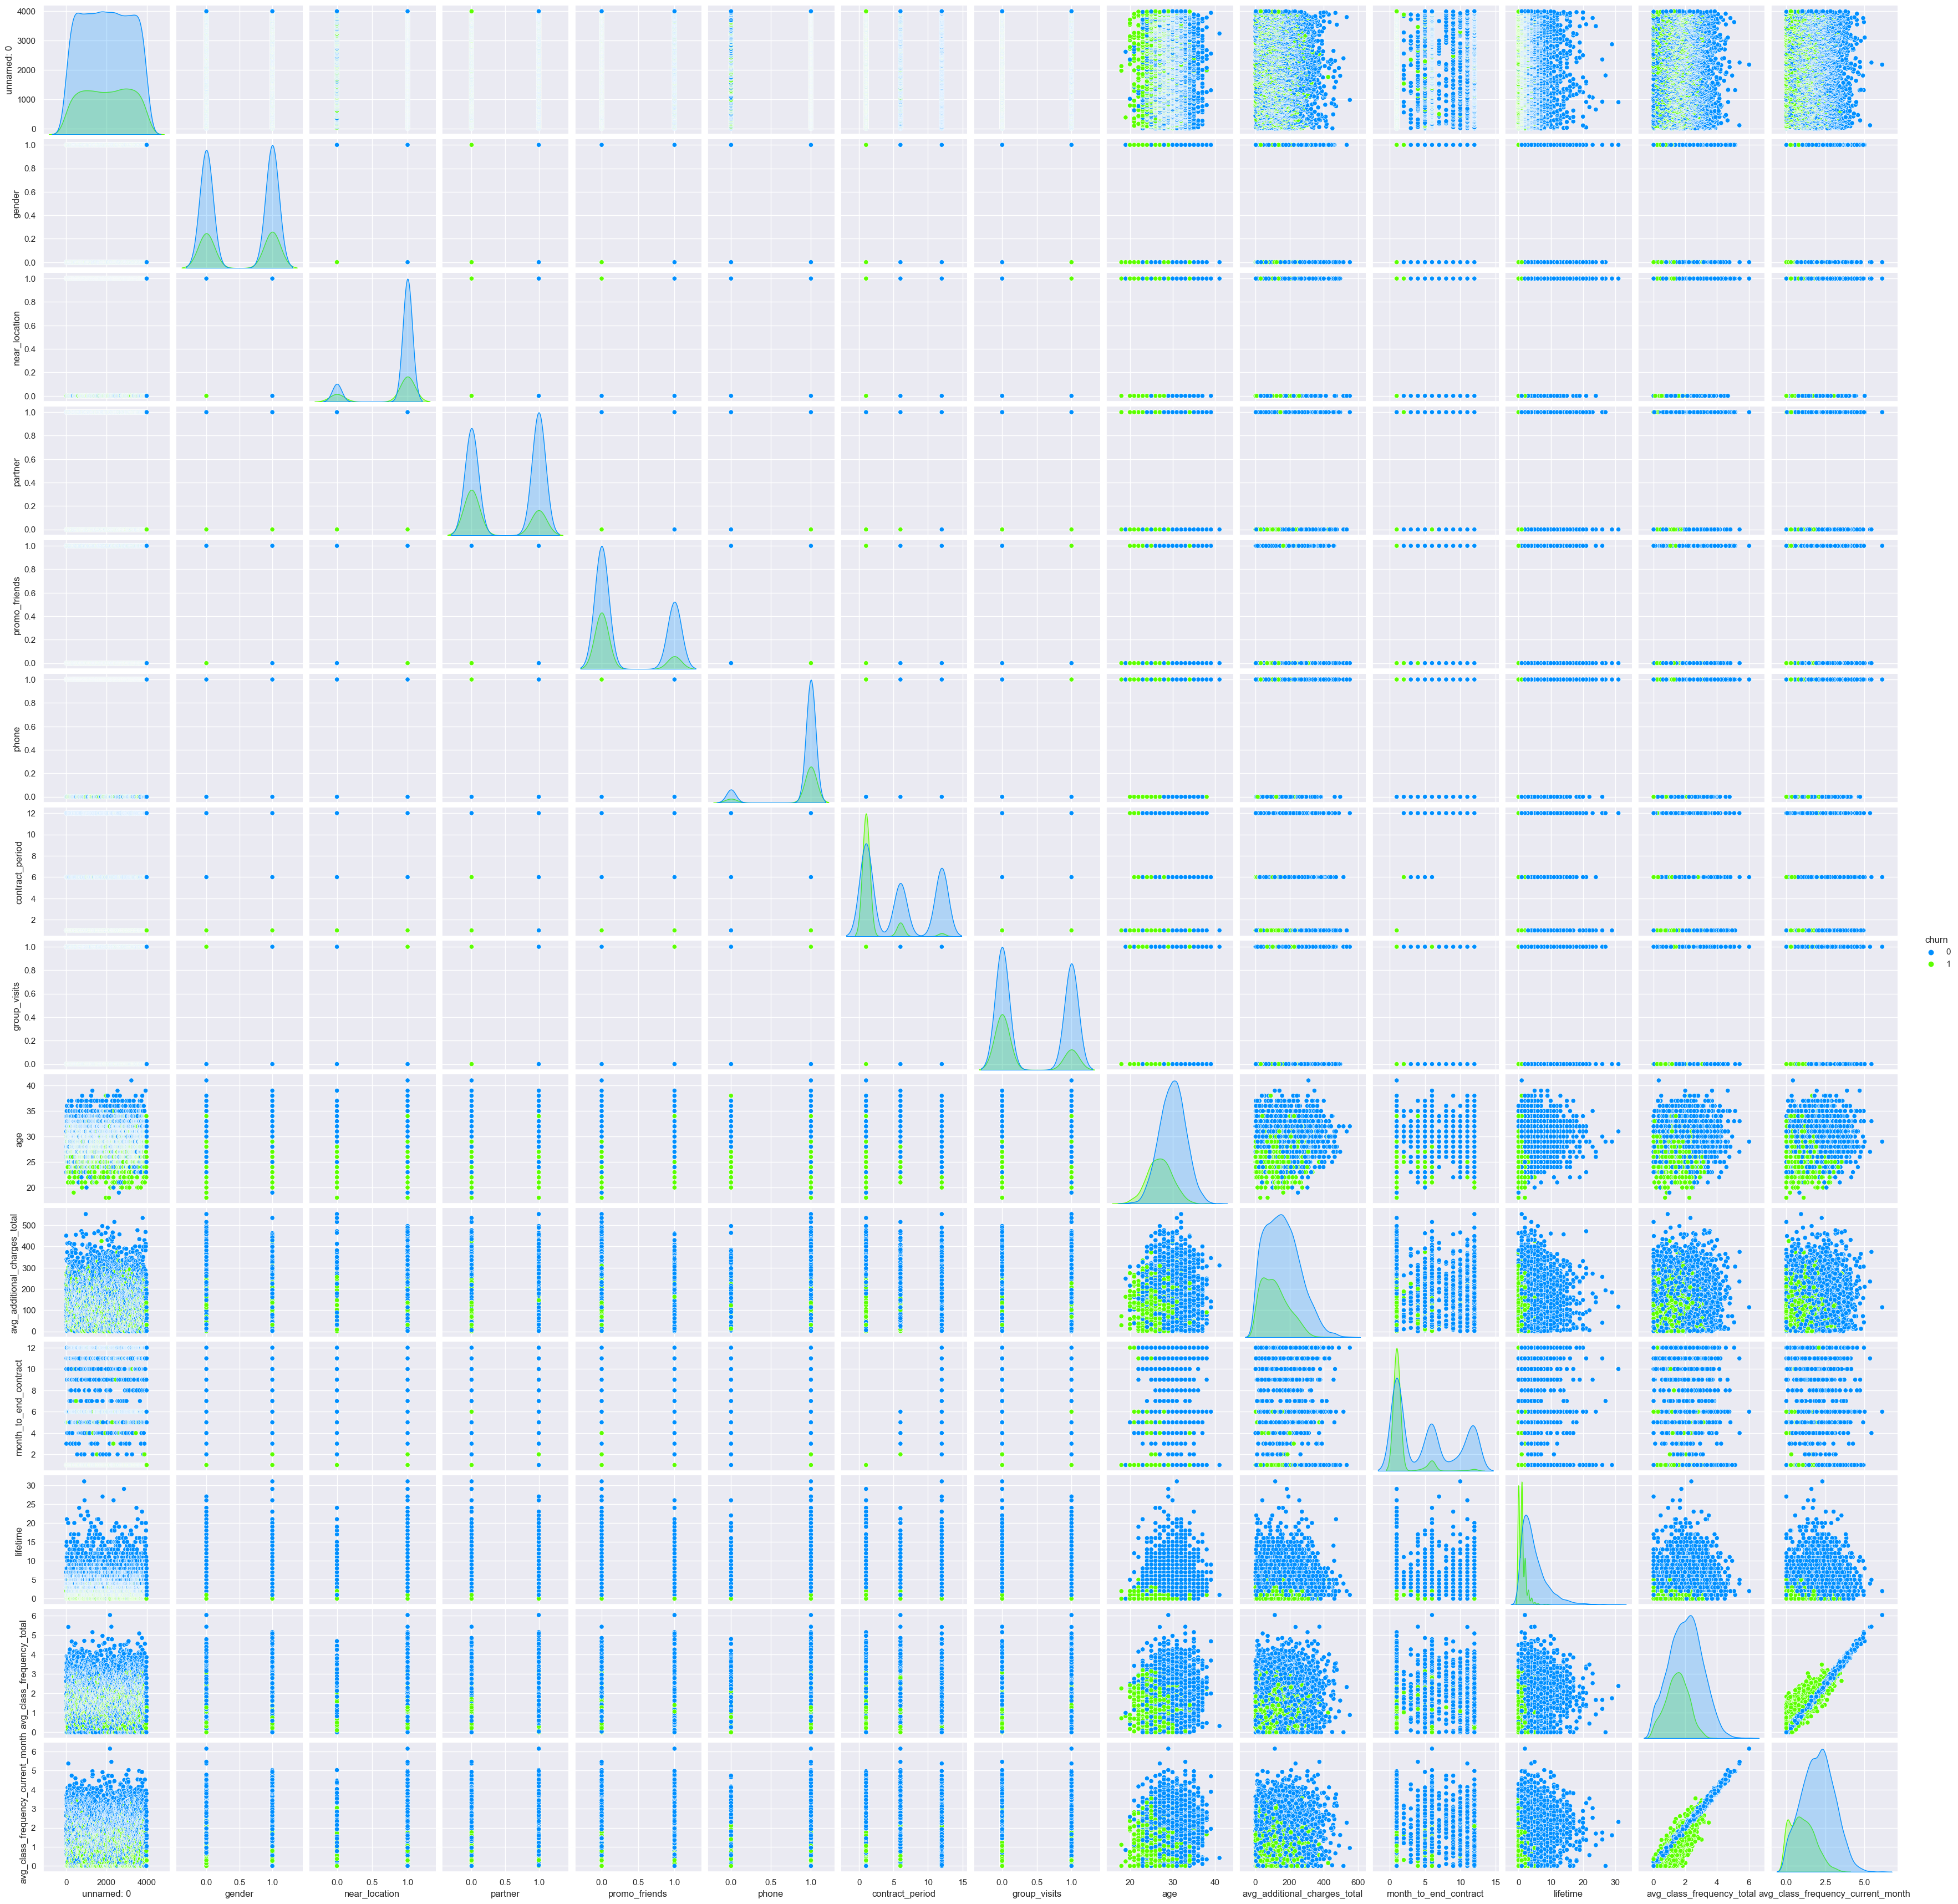

In [9]:
sns.pairplot(df,hue= 'churn', palette="gist_rainbow_r");

## Построим столбчатые гистограммы и распределения признаков для тех, кто ушел и тех, кто остался.

In [10]:
left = df[df['churn']==1]
stayed = df[df['churn']==0]
distplot_columns = ['avg_additional_charges_total', 'avg_class_frequency_total', 
                    'avg_class_frequency_current_month', 'lifetime', 'age', 
                    'contract_period', 'month_to_end_contract']

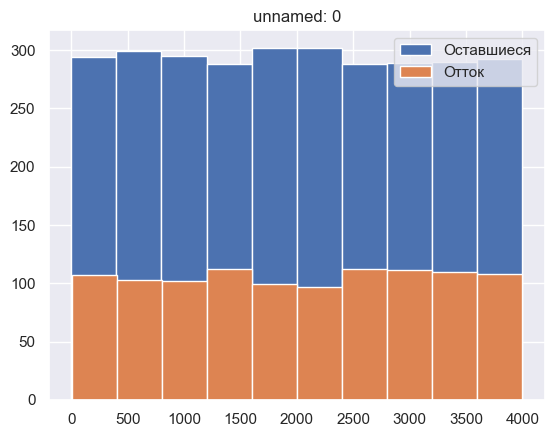

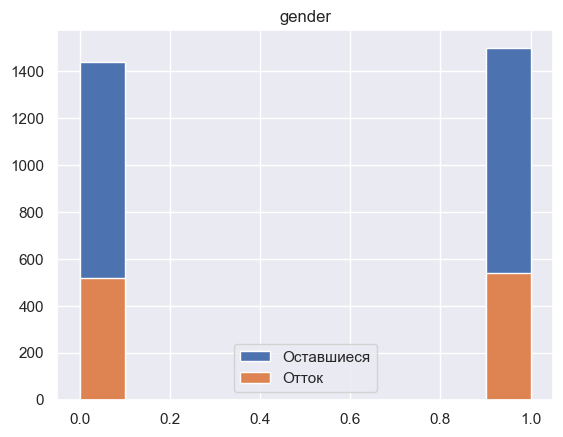

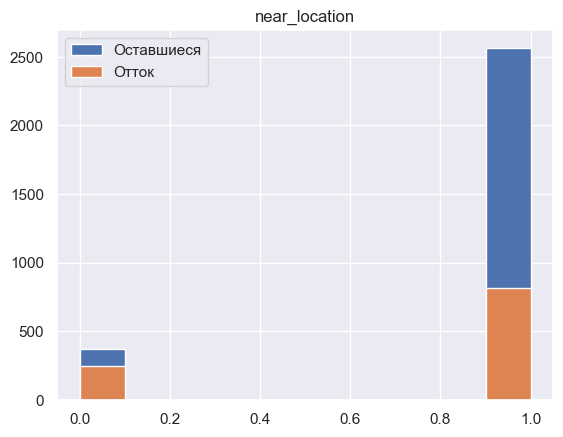

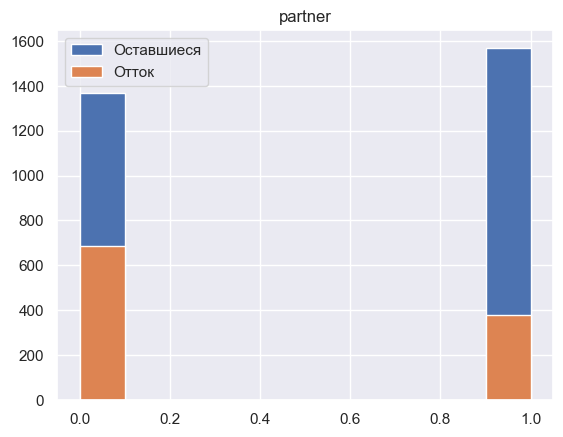

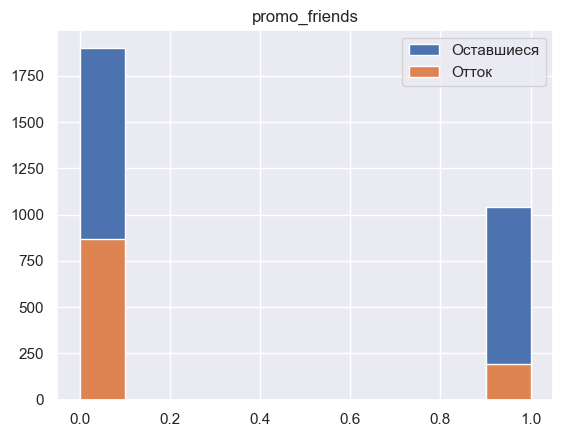

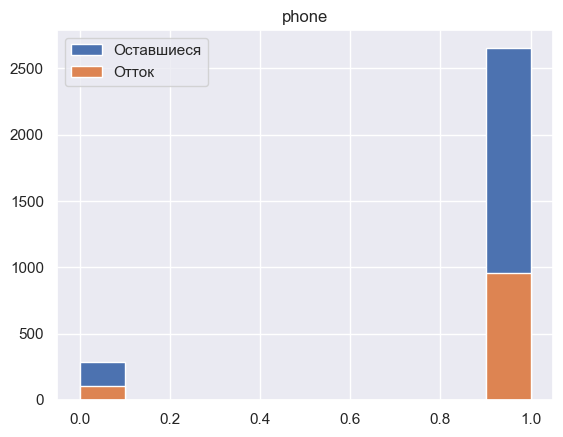

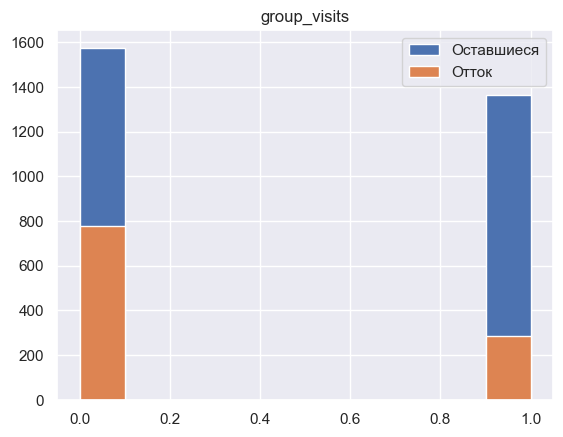

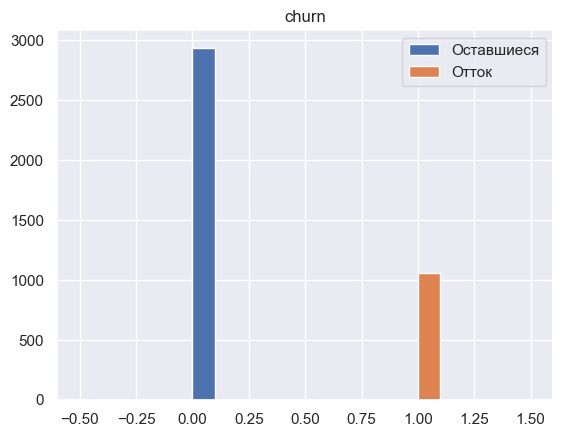

In [11]:
for column in df.columns:
    if column not in distplot_columns:
        df.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()


/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


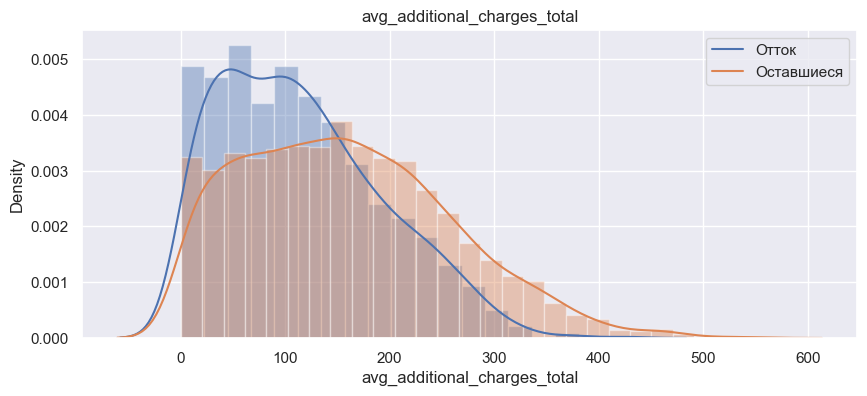

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


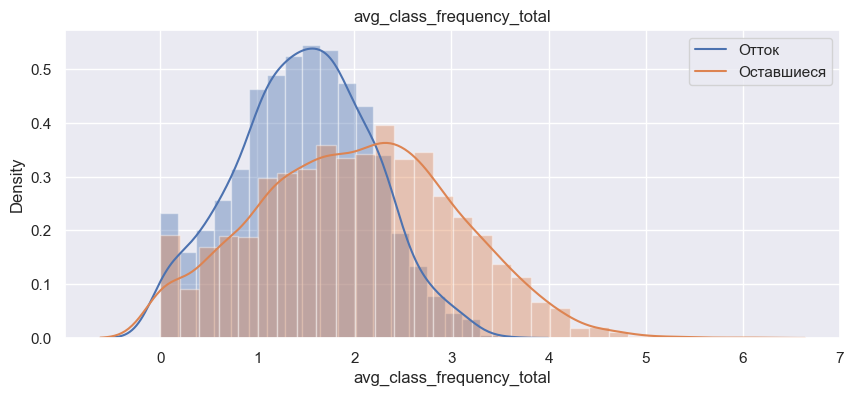

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


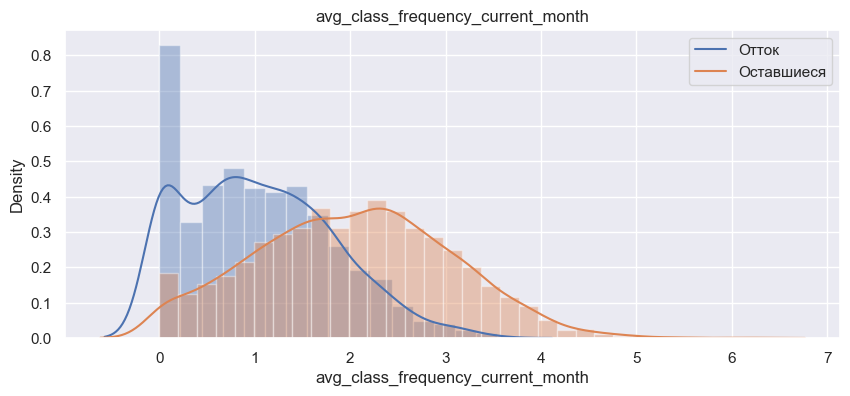

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


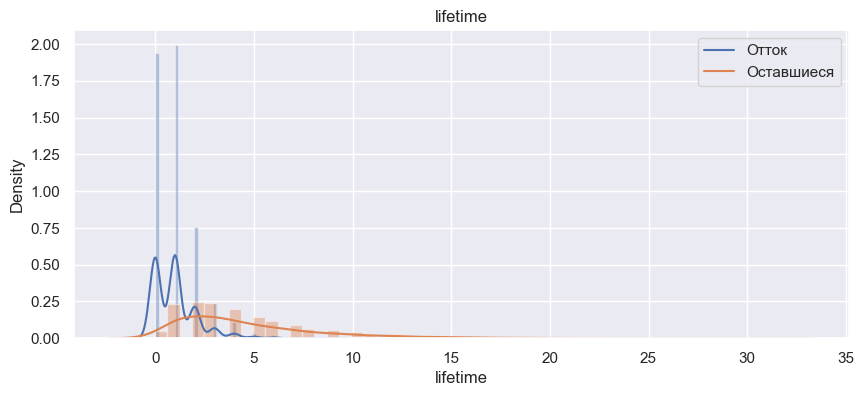

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


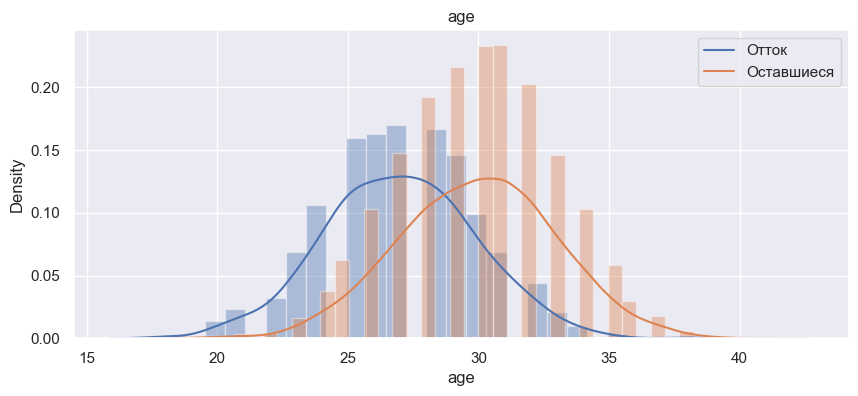

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


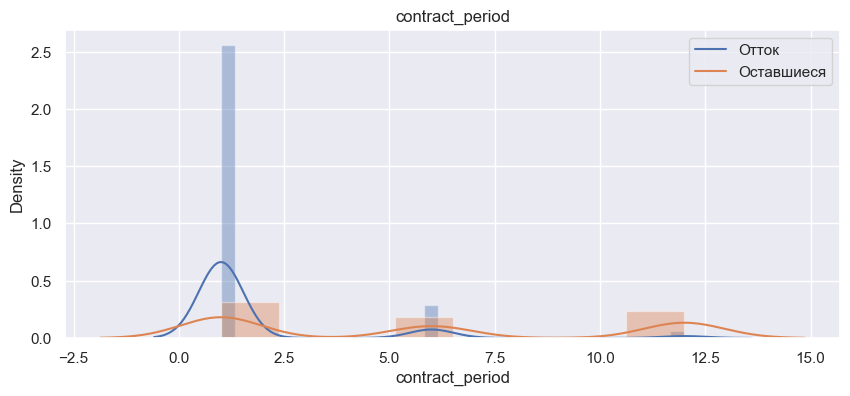

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/liza/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


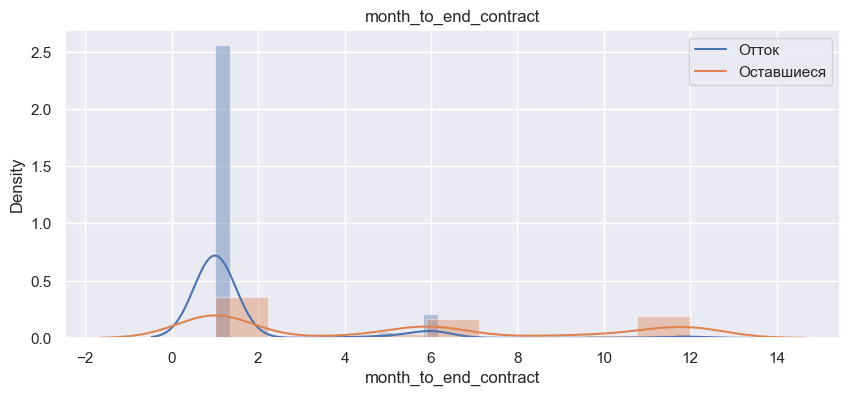

In [12]:
for column in distplot_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(left[column])
    sns.distplot(stayed[column])
    plt.legend(['Отток', 'Оставшиеся'])
    plt.show()

In [13]:
plt.figure(figsize=(14,10))
fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,aspect='auto')
fig.show()


### Вывод:
- Явной зависимости факта оттока от признаков не обнаружено
- Имеются два мультиколлинеарных признака - contract_period и month_to_end_contact

In [14]:
df.columns

Index(['unnamed: 0', 'gender', 'near_location', 'partner', 'promo_friends',
       'phone', 'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<Figure size 1400x1000 with 0 Axes>

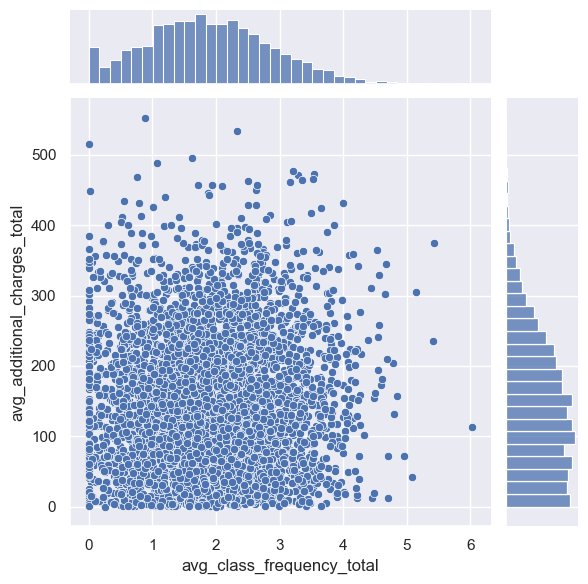

In [15]:
# Комбинация гистограмм и диаграмм рассеивания.
sns.jointplot(y='avg_additional_charges_total', x='avg_class_frequency_total', data=df)
plt.show()

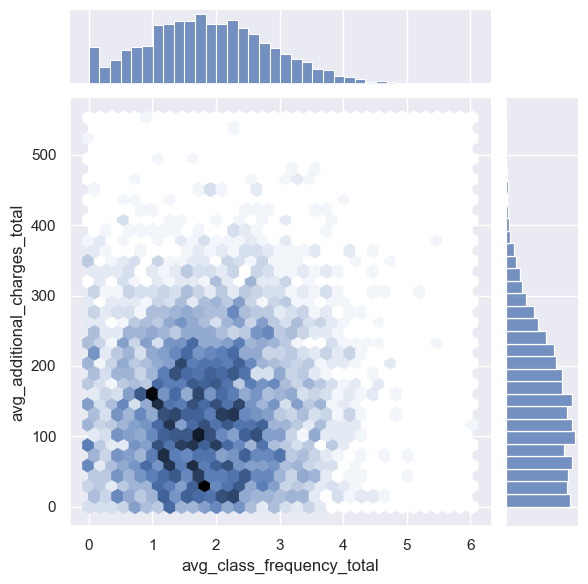

In [16]:
sns.jointplot(y='avg_additional_charges_total', x='avg_class_frequency_total',data=df, kind="hex")
plt.show()

In [17]:
df.age.describe().T

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

In [18]:
def age_cat (df):
    if df['age'] <30 :
        return 'young '
    else:
        return 'adult'

    
df['age_cat'] = df.apply(age_cat, axis = 1)

In [19]:
main = df.groupby([ 'gender','age_cat', 'churn']).agg({'churn': 'count'}).rename(columns = {'churn': 'count'}).reset_index()

st = {0: "Остался", 1: "Ушел"}

main['churn'] = main['churn'].map(st)

fig = px.sunburst(main, path = ['churn','gender','age_cat'], values = 'count', color = 'churn', title = '',
                 color_discrete_map = {"Остался": '#1092c9', "Ушел": '#c91010'},
                width = 700, height = 700)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [20]:
df.head()

unnamed: 0  gender  near_location  partner  promo_friends  phone  \
0           0       1              1        1              1      0   
1           1       0              1        0              0      1   
2           2       0              1        1              0      1   
3           3       0              1        1              1      1   
4           4       1              1        1              1      1   

   contract_period  group_visits  age  avg_additional_charges_total  \
0                6             1   29                     14.227470   
1               12             1   31                    113.202938   
2                1             0   28                    129.448479   
3               12             1   33                     62.669863   
4                1             0   26                    198.362265   

   month_to_end_contract  lifetime  avg_class_frequency_total  \
0                    5.0         3                   0.020398   
1                   12.0         7                   1.922936   
2                    1.0         2                   1.859098   
3                   12.0         2                   3.205633   
4                    1.0         3                   1.113884   

   avg_class_frequency_current_month  churn age_cat  
0                           0.000000      0  young   
1                           1.910244      0   adult  
2                           1.736502      0  young   
3                           3.357215      0   adult  
4                           1.120078      0  young

In [21]:
main = df.groupby([ 'gender','contract_period', 'churn']).agg({'churn': 'count'}).rename(columns = {'churn': 'count'}).reset_index()

st = {0: "Остался", 1: "Ушел"}

main['churn'] = main['churn'].map(st)

fig = px.sunburst(main, path = ['churn','gender','contract_period'], values = 'count', color = 'churn', title = '',
                 color_discrete_map = {"Остался": '#1092c9', "Ушел": '#c91010'},
                width = 700, height = 700)

fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5)

fig.update_traces(textinfo = 'label + percent parent')
                  
fig.show()

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/liza/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Lab3